# Kiểm tra giữa kì
---------------------------------
- Họ và tên: Chu Văn Hưng
- Mã sinh viên: 18020020
- Lớp: K63C-CLC
----------------------------------

## Yêu cầu
![Tìm kiếm vật thể trong ảnh](1.jpg)



## Bài làm

#### Phương pháp: Template matching

#### Tiền xử lý

1. Do ảnh ban đầu có chứa cả vùng tìm kiếm và vật thể tìm kiếm. Nên ta cần cắt ảnh ra thành các file ảnh bao gồm
    - Ảnh vùng tìm kiếm <img src="base.jpg" alt="ảnh tìm kiếm" width="300"/>
    - Ảnh vật thể cần tìm kiếm 
        <img src="template_1.jpg" alt="ảnh cần tìm kiếm" width="100"/>
        <img src="template_2.jpg" alt="ảnh cần tìm kiếm" width="100"/>
        ...
        
 để tìm kiếm từng vật thể một trong vùng tìm kiếm.

In [1]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

import cv2
import numpy as np
from matplotlib import pyplot as plt 

def show(img, w, h):
    plt.figure(figsize = (w,h))
    plt.axis("off")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

2. Sử dụng Canny (Canny Edge Detection) trong opencv để chuyển ảnh màu thành ảnh đen trắng chỉ bao gồm các cạnh trong ảnh. Nếu ta vẫn để nguyên dạng màu hoặc dạng gray thì khi so sánh, ảnh vật thể cần tìm kiếm có nền trắng sẽ khác với nền của vật thể trong vùng càn tìm kiếm, dẫn đến kết quả không chính xác.

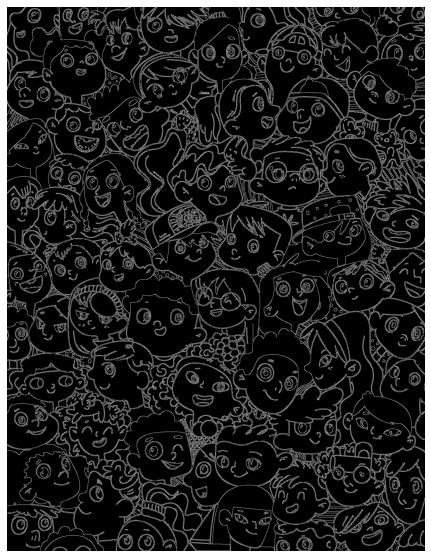

In [2]:
source_image = cv2.imread("base.jpg")
source_edge = cv2.Canny(source_image, 50, 200)
show(source_edge, 10, 10)

In [3]:
h, w = source_image.shape[:2]
templates = ["template_1.jpg", "template_2.jpg", "template_3.jpg", "template_4.jpg", "template_5.jpg", "template_6.jpg", "template_7.jpg", "template_8.jpg", "template_9.jpg", "template_10.jpg", "template_11.jpg", "template_12.jpg", "template_13.jpg", "template_14.jpg", "template_15.jpg"]


3. 
  - Các vật thể khi cắt ra sẽ có kích thước khác với vật thể trong vùng tìm kiếm. Ta cần resize lại kích thước của vùng tìm kiếm để có thể tìm được chính xác nhất. 
  
  - Do không biết được kích thước chính xác là bao nhiêu, ta phải thực hiện resize dần dần đến khi tìm được chính xác vật thể.
  
  - Mỗi lần resize, ta sử dụng hàm **matchTemplate** trong openCV để tính độ chính xác và vị trí. Với mỗi lần như thế, ta lưu lại vị trí, tỉ lệ của ảnh gốc so với ảnh resize có độ chính xác cao nhất
  
  - Cuối cùng, với vị trí và tỉ lệ có được, ta vẽ được hình chữ nhật bao xung quanh vật thể trong ảnh cần tìm kiếm.

In [4]:
def matching(img):
    template = cv2.imread(img)
    found = None
    (tH, tW) = template.shape[:2]
    tEdged = cv2.Canny(template, 50, 200)
    
    for scale in range(10, 21):
        resized = cv2.resize(source_image, dsize = (0,0), fx = scale/10, fy = scale/10)
        r = source_image.shape[1] / float(resized.shape[1])
        edged = cv2.Canny(resized, 50, 200)
        result = cv2.matchTemplate(edged, tEdged, cv2.TM_CCOEFF)
        (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)

        if found is None or maxVal > found[0]:
            found = (maxVal, maxLoc, r)

    (_, maxLoc, r) = found
    (startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
    (endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))
    cv2.rectangle(source_image, (startX, startY), (endX, endY), (0, 255, 0), 2)


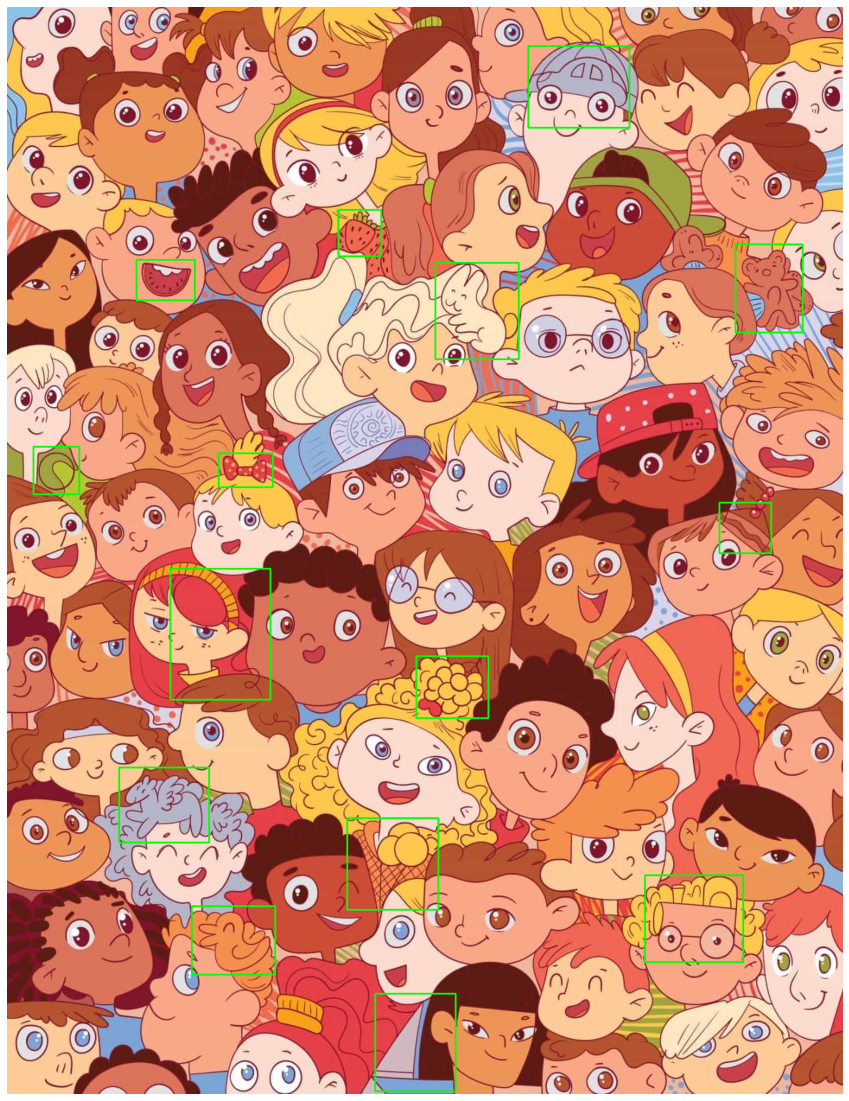

In [5]:
for img in templates:
    matching(img)

show(source_image, 20, 20)